In [30]:
import pandas as pd
import numpy as np
from seaborn import load_dataset 
import matplotlib.pyplot as plt

In [5]:
df = load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [13]:
x = df[['sepal_length','petal_length']]
y = df[['species']]
y=encoder.fit_transform(y)

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape,x_test.shape

((120, 2), (30, 2))

In [16]:
from sklearn.linear_model import LogisticRegression
softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [18]:
from sklearn.metrics import accuracy_score
y_pred = softmax.predict(x_test)
accuracy_score(y_pred,y_test)

0.9666666666666667

In [20]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [24]:
# prediction
query = np.array([[3.4,2.7]])
softmax.predict_proba(query)

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [25]:
softmax.predict(query)

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [27]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'softmax on iris')

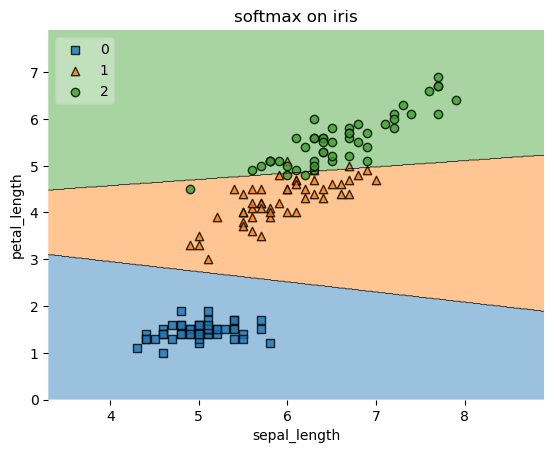

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y,softmax,legend=2)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('softmax on iris')

In [34]:
coef = softmax.coef_

In [35]:
intercept = softmax.intercept_

In [48]:
m1 , b1 = -coef[0][0]/coef[0][1],-intercept[0]/coef[0][1]
m2 , b2 = -coef[1][0]/coef[1][1],-intercept[1]/coef[1][1]
m3 , b3 = -coef[2][0]/coef[2][1],-intercept[2]/coef[2][1]

In [49]:
softmax.coef_

array([[-0.21008149, -2.92359787],
       [ 0.34717809, -0.35033387],
       [-0.13709661,  3.27393174]])

In [50]:
softmax.intercept_

array([ 11.42312524,   1.60537323, -13.02849847])

(0.0, 8.0)

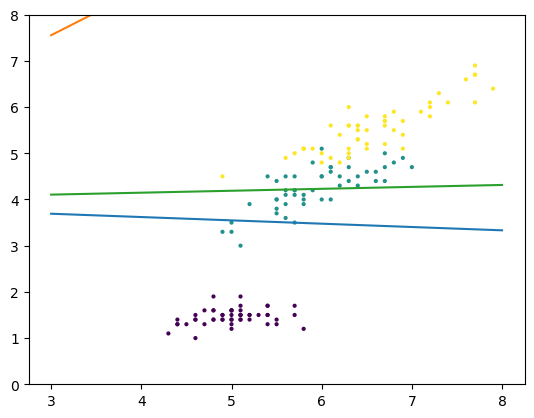

In [54]:
plt.scatter(df['sepal_length'],df['petal_length'],c=y,s=4)
x_inp = np.linspace(3,8,100)
y1 = m1*x_inp+b1
y2 = m2*x_inp+b2
y3 = m3*x_inp+b3
plt.plot(x_inp,y1)
plt.plot(x_inp,y2)
plt.plot(x_inp,y3)
plt.ylim(0,8)